In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv('../mnist_record_stats_new.csv')

In [ ]:
def plot_heatmap0(df):
    cols = filter(lambda x: "norm" in x or "var" in x, df.columns)
    df = df[cols]

    df = df.T
    plt.figure(figsize=(150, 40))
    sns.heatmap(df, annot=True, cmap='viridis', fmt=".5f")
    # plt.imshow(df, cmap='viridis', aspect='auto')

    plt.title('Heatmap of Batch Size Data')
    plt.xlabel('Metrics')
    plt.ylabel('Batch Sizes')
    plt.show()

plot_heatmap0(df)



In [114]:
df = df.iloc[[0, 15, 30, 45, 60, 75], :]

In [115]:
df

,Unnamed: 0,l1_grad_norm,l1_weight_spectral_norm,l1_x_spectral_norm,l1_x_grad_spectral_norm,l1_grad_out_spectral_norm,l1_x_var,l1_x_grad_var,l1_grad_out_var,l1_l1_xp,...,l5_l4_wbp,l5_l4_xbp,l5_l5_xp,l5_l5_wp,l5_l5_go1p,l5_l5_go2p,l5_l5_wbp,l5_l5_xbp,loss,acc
0,0,0.757938,1.261244,127.213310,0.005551,0.005756,0.955245,6.649632e-09,5.838135e-08,3.685734,...,0.0,0.0,0.437254,1.133591,0.0,0.712245,0.0,0.655439,0.103902,0.093750
15,15,0.607216,1.261737,134.410080,0.006888,0.007220,1.023209,5.814513e-09,5.106566e-08,2.607753,...,0.0,0.0,1.737036,5.278460,0.0,2.372871,0.0,1.697688,0.078369,0.546875
30,30,0.711813,1.263952,130.184891,0.008198,0.008516,1.016691,8.653564e-09,7.472755e-08,4.473202,...,0.0,0.0,0.737728,1.802438,0.0,0.418281,0.0,0.646333,0.059639,0.812500
45,45,0.692817,1.267076,134.881439,0.010344,0.010349,1.061946,1.184090e-08,1.000968e-07,2.038836,...,0.0,0.0,8.276904,19.583622,0.0,2.982737,0.0,2.189227,0.054648,0.703125
60,60,0.709247,1.269693,128.900192,0.009642,0.009590,1.019489,1.177365e-08,9.836064e-08,6.010828,...,0.0,0.0,11.152032,30.441999,0.0,3.646005,0.0,2.031137,0.042490,0.859375
75,75,0.839010,1.272440,127.242744,0.012347,0.012492,0.970442,1.323319e-08,1.087212e-07,7.065350,...,0.0,0.0,10.724619,23.678452,0.0,2.606640,0.0,1.702979,0.036723,0.812500


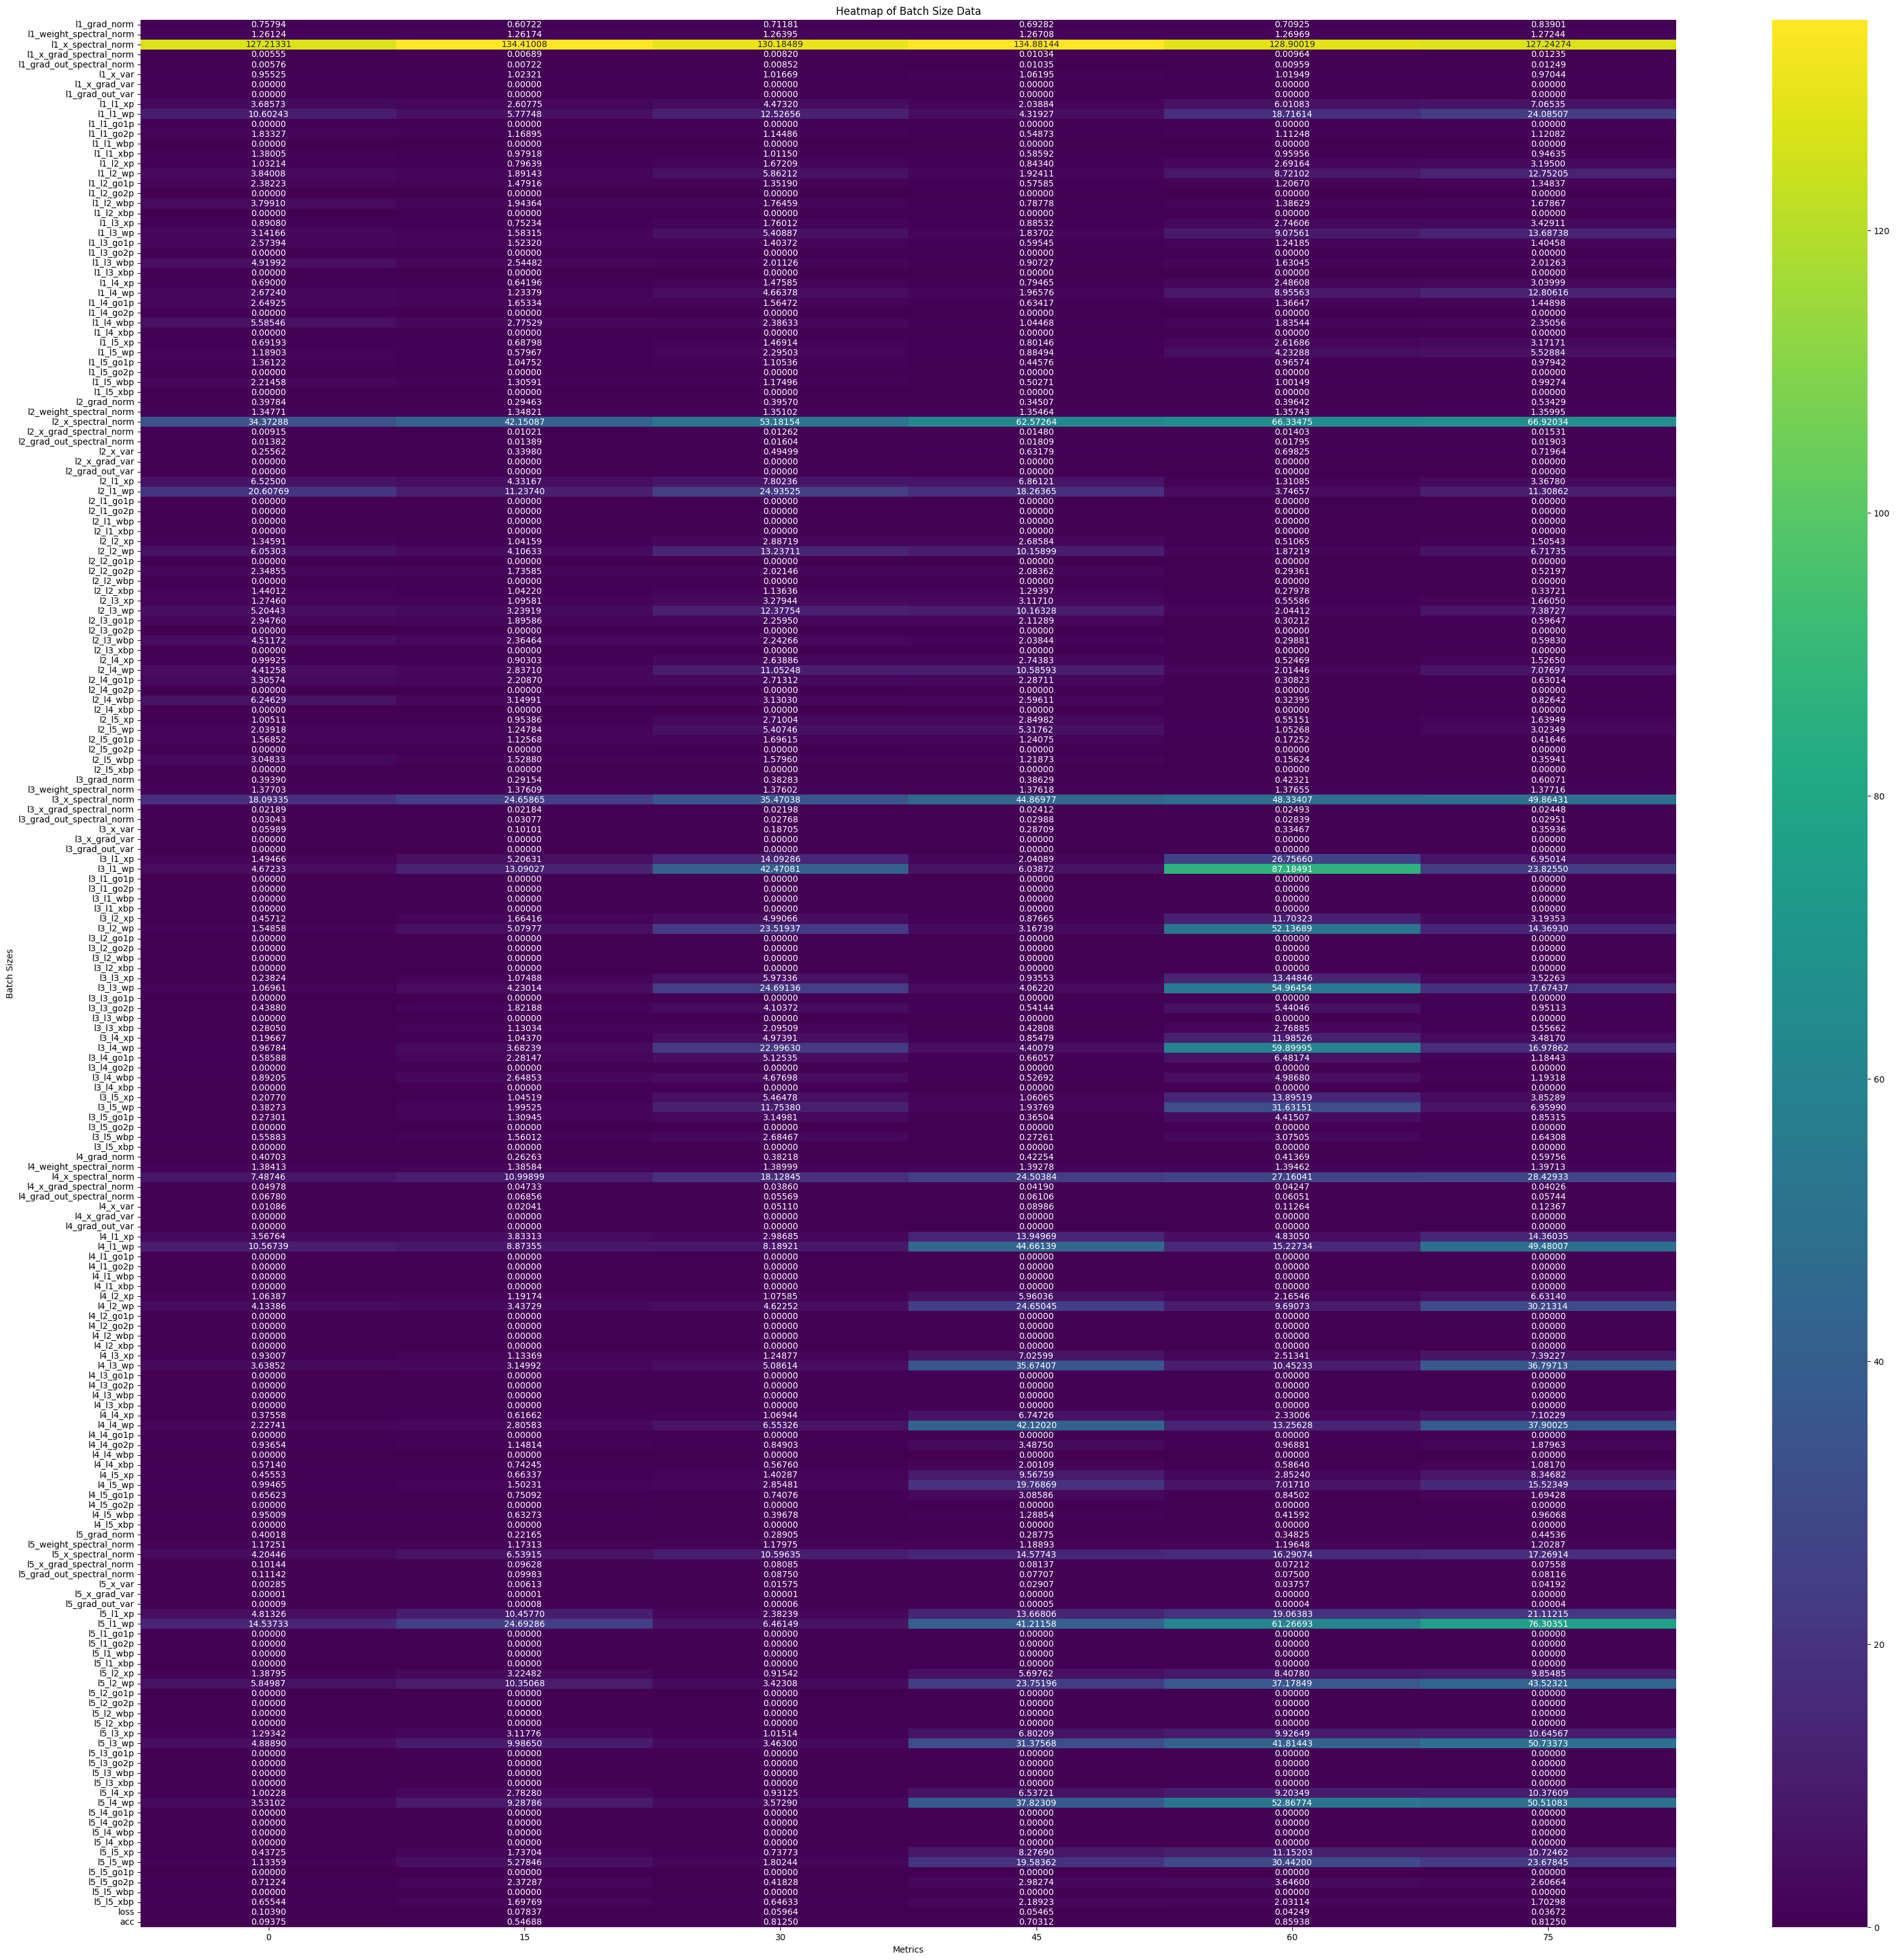

In [116]:
import seaborn as sns

def plot_heatmap(data):
    # Convert the dictionary to a DataFrame
    data = data.drop(columns=['Unnamed: 0'])
    df = pd.DataFrame(data).T

    # Create the heatmap
    plt.figure(figsize=(40, 40))
    sns.heatmap(df, annot=True, cmap='viridis', fmt=".5f")
    # plt.imshow(df, cmap='viridis', aspect='auto')

    plt.title('Heatmap of Batch Size Data')
    plt.xlabel('Metrics')
    plt.ylabel('Batch Sizes')
    plt.show()

plot_heatmap(df)


In [ ]:
print(df.iloc[0, :])

In [126]:
ls = [1, 2, 3, 4, 5]

layer_mat = {}
t = 0

this_time_step = df.iloc[t, :]

# Iterate over each column in the DataFrame
for col in this_time_step.keys():
    # Check if the column name contains 'l'
    lpart = col.split('_')[0]  # e.g., 'bs512'
    tail = '_'.join(col.split('_')[1:])  # e.g., 'f2_b2_rnearest_False_bias'
    
    # Ensure the batch size is one of the considered sizes
    for l in ls:
        if f'l{l}' in lpart:
            # Initialize list for this batch size if not already done
            if l not in layer_mat:
                layer_mat[l] = {}
            
            # Append the value to the list for this batch size
            layer_mat[l][tail] = this_time_step[col]

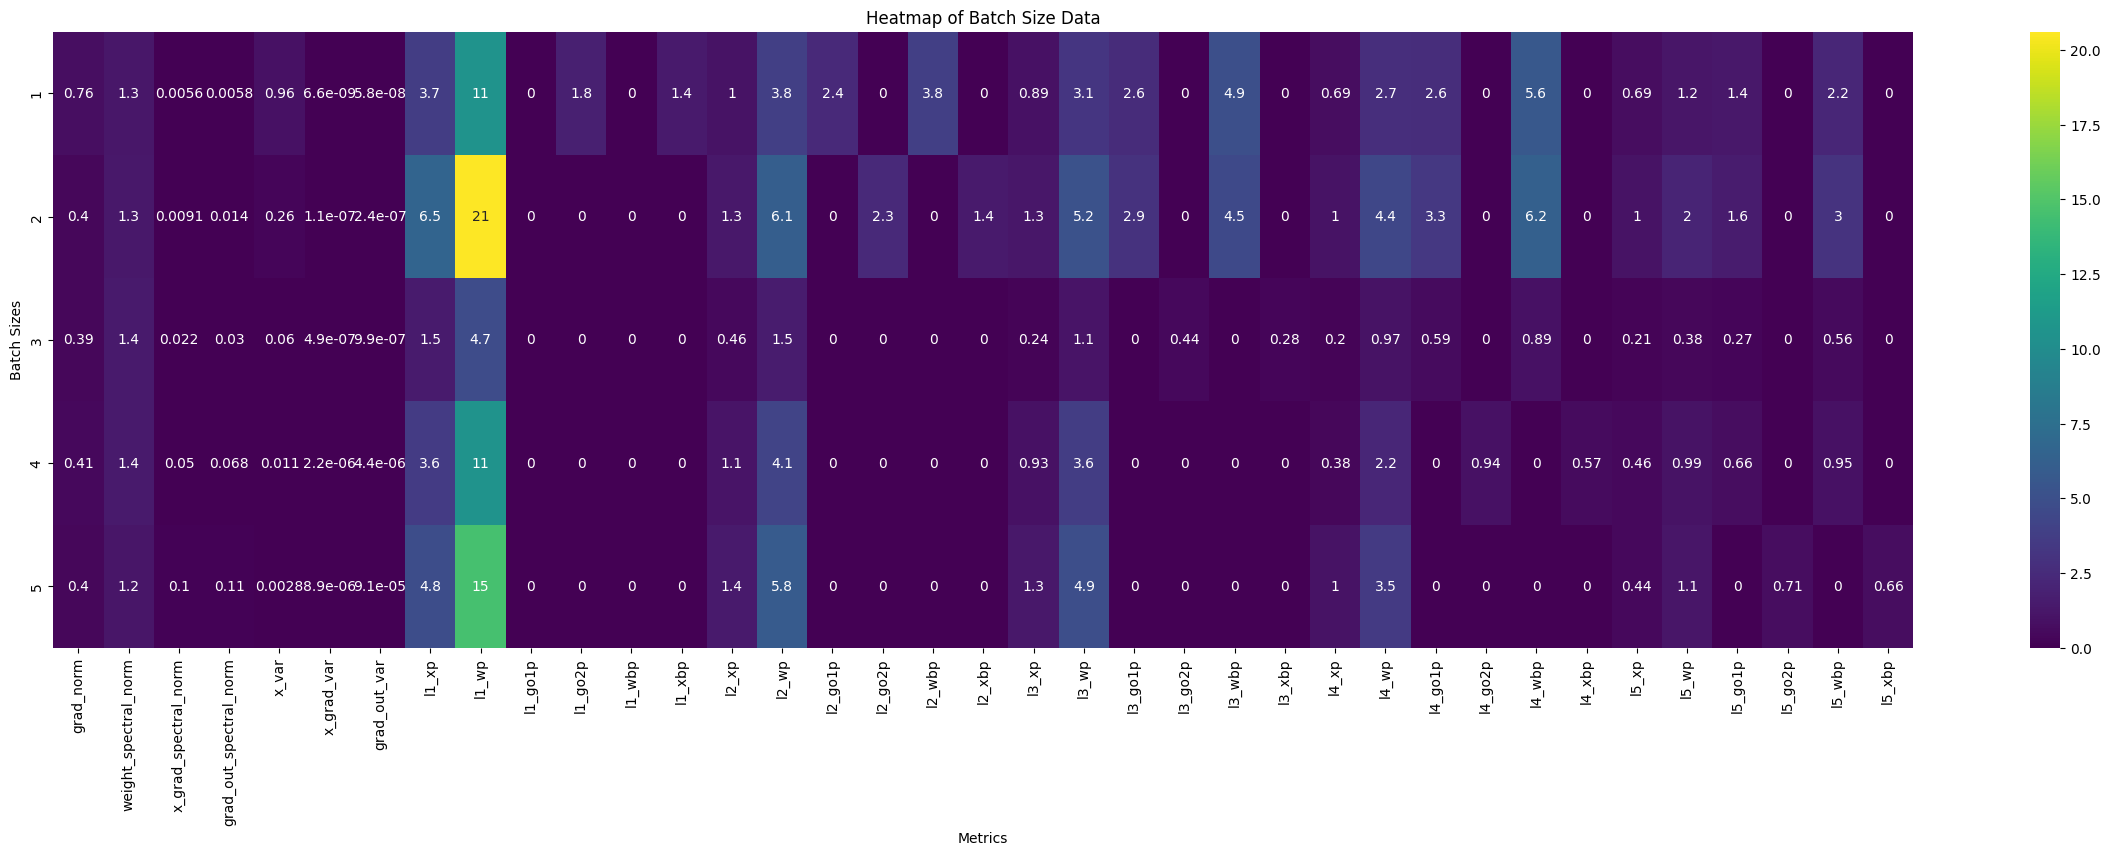

In [127]:
import seaborn as sns

def plot_heatmap(data):
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(data).T
    df = df.drop(columns=['x_spectral_norm'])

    # Create the heatmap
    plt.figure(figsize=(30, 8))
    sns.heatmap(df, annot=True, cmap='viridis')
    # plt.imshow(df, cmap='viridis', aspect='auto')

    plt.title('Heatmap of Batch Size Data')
    plt.xlabel('Metrics')
    plt.ylabel('Batch Sizes')
    plt.show()

plot_heatmap(layer_mat)

In [ ]:
import math
df.apply(lambda x: math.exp(x))